In [23]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20

# device will determine whether to run the training on gpu, cpu, or mps
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if torch.backends.mps.is_available():
  if torch.backends.mps.is_built():
    device = torch.device("mps")

device

device(type='mps')

In [10]:
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])
# create Training dataset
train_dataset = torchvision.datasets.CIFAR10(root = './data',
                                             train = True,
                                             transform = all_transforms,
                                             download = True)

# create Testing dataset
test_dataset = torchvision.datasets.CIFAR10(root = './data',
                                            train = False,
                                            transform = all_transforms,
                                            download=True)

# instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
class ConvNeuralNet(nn.Module):
  def __init__(self, num_classes):
    super(ConvNeuralNet, self).__init__()

    # RGB channel input
    self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
    self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
    self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
    self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
    self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.fc1 = nn.Linear(1600, 128)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(128, num_classes)

  def forward(self, x):
    out = self.conv_layer1(x)
    out = self.conv_layer2(out)
    out = self.max_pool1(out)

    out = self.conv_layer3(out)
    out = self.conv_layer4(out)
    out = self.max_pool2(out)

    out = out.reshape(out.size(0), -1)

    out = self.fc1(out)
    out = self.relu1(out)
    out = self.fc2(out)
    return out

In [7]:
model = ConvNeuralNet(num_classes)
model.to(device)

# set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9) 

total_step = len(train_loader)

In [8]:
for epoch in range(num_epochs):
  # load in the data in batches using the train_loader object
  for i, (images, labels) in enumerate(train_loader):  
    # move tensors to the configured device
    images = images.to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'epoch [{epoch+1}/{num_epochs}], loss: {loss.item()}')


epoch [1/20], loss: 1.747666597366333
epoch [2/20], loss: 1.4852015972137451
epoch [3/20], loss: 1.4768486022949219
epoch [4/20], loss: 1.213904619216919
epoch [5/20], loss: 1.2397747039794922
epoch [6/20], loss: 1.2355390787124634
epoch [7/20], loss: 1.3342149257659912
epoch [8/20], loss: 0.8057342767715454
epoch [9/20], loss: 0.9878143668174744
epoch [10/20], loss: 0.9039096236228943
epoch [11/20], loss: 0.5316295623779297
epoch [12/20], loss: 1.0502550601959229
epoch [13/20], loss: 0.516770601272583
epoch [14/20], loss: 0.8771440386772156
epoch [15/20], loss: 0.8493841290473938
epoch [16/20], loss: 0.6469555497169495
epoch [17/20], loss: 0.5356068015098572
epoch [18/20], loss: 0.25706276297569275
epoch [19/20], loss: 0.6493613123893738
epoch [20/20], loss: 0.35052645206451416


In [14]:
def get_accuracy(loader):
  with torch.no_grad():
    correct = 0
    total = 0
    n = 0
    for images, labels in train_loader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      n += 1
      if n%1000 == 0:
        print(f'checked {n}')
    return correct / total

accuracy = get_accuracy(test_loader)
print(f'{accuracy} accuracy')

0.8282 accuracy


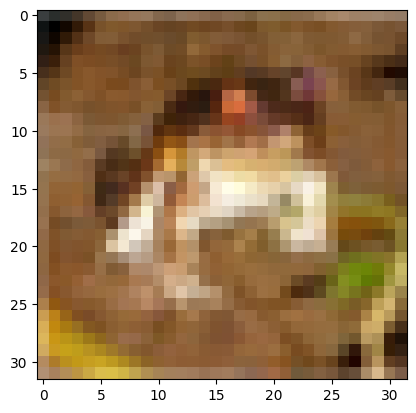

In [42]:
img, label = train_dataset[0]

inv_norm = transforms.Compose([
  transforms.Normalize(mean=[0.,0.,0.], std=[1/0.2023, 1/0.1994, 1/0.2010]),
  transforms.Normalize(mean=[-0.4914, -0.4822, -0.4465], std=[1, 1, 1])
])
img = inv_norm(img)

img = torchvision.transforms.ToPILImage()(img)
# img = img.reshape(3, 32, 32)
#img = img.transpose((1,2,0))
plt.imshow(img)

In [43]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.201])
           )